<a href="https://colab.research.google.com/github/Arghavankas2022/NMA/blob/main/Plotting_likelihood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!python calms21_convert_to_npy.py  --input_directory '.' --output_directory '.' #--parse_treba #added for loading extra features

Saving ./calms21_task1_train
Saving ./calms21_task1_test


In [ ]:
def load_task1_data(data_path):
  """
  Load data for task 1:
      The vocaubulary tells you how to map behavior names to class ids;
      it is the same for all sequences in this dataset.
  """
  data_dict = np.load(data_path, allow_pickle=True).item()
  dataset = data_dict['annotator-id_0']
  # Get any sequence key.
  sequence_id = list(data_dict['annotator-id_0'].keys())[0]
  vocabulary = data_dict['annotator-id_0'][sequence_id]['metadata']['vocab']
  return dataset, vocabulary

In [ ]:
def filter_sequences_by_frame_count(dataset, min_frame_count=14000):
    filtered_dataset = {k: v for k, v in dataset.items() if len(v['annotations']) > min_frame_count}
    return filtered_dataset

In [ ]:
training_data, vocab = load_task1_data('./calms21_task1_train.npy')
test_data, _ = load_task1_data('./calms21_task1_test.npy')

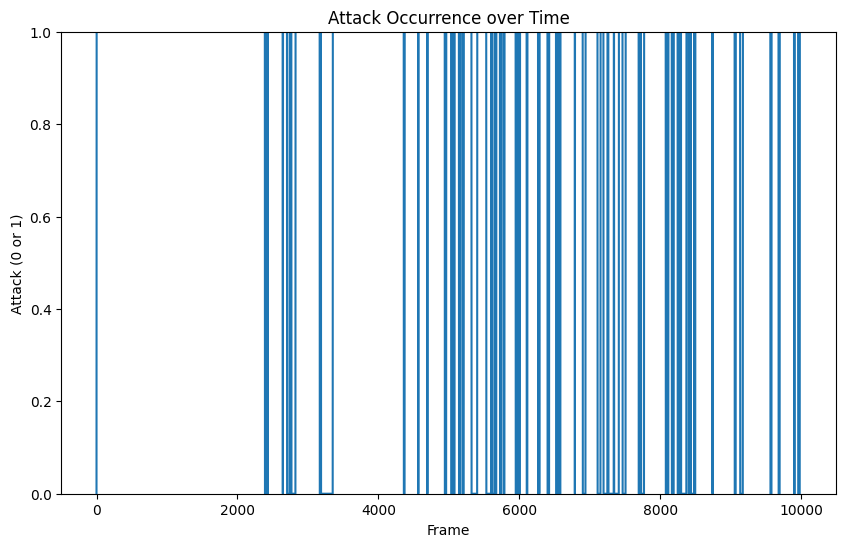

In [ ]:
import matplotlib.pyplot as plt

# Combine training and test data
all_data = {**training_data, **test_data}

# Extract the investigation label id
behavior_id = vocab['attack']

# Initialize
all_frames_behavior = []

# Iterate through all sequences
for sequence_key, sequence_data in all_data.items():
    annotations = sequence_data['annotations']
    # Check if desired behavior is happening in each frame
    behavior_likelihood = (annotations == behavior_id).astype(int)
    all_frames_behavior.append(behavior_likelihood)

# Find the minimum sequence length
#min_frames = min(len(seq) for seq in all_frames_behavior)

# Use the minimum sequence length as max_frames
#max_frames = min_frames
# Set the desired number of frames to average of 10000
max_frames = 10000

# Initialize
num_sequences = len(all_frames_behavior)
plot_data = np.zeros((num_sequences, max_frames))

# Iterate through each sequence and copy data up to `max_frames` length
for i, seq in enumerate(all_frames_behavior):
    seq_length = len(seq)
    if seq_length > max_frames:
        plot_data[i] = seq[:max_frames]
    else:
        plot_data[i, :seq_length] = seq

# Calculate the maximum likelihood of behavior across all sequences for each frame
max_behavior_likelihood = np.max(plot_data, axis=0)

# Plot the likelihood of behavior
plt.figure(figsize=(10, 6))
plt.plot(max_behavior_likelihood)
plt.xlabel('Frame')
plt.ylabel('Attack (0 or 1)')
plt.title('Attack Occurrence over Time')
plt.ylim(0, 1)
plt.show()
